In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 14.8 MB/s eta 0:00:00


# Part 1

In [ ]:
pip install opencv-python torch torchvision


In [ ]:
import os
import cv2
import torch
from torchvision import models, transforms
from PIL import Image
from torchvision.utils import draw_bounding_boxes
import torchvision
import numpy as np
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
source_video_path = '/content/drive/MyDrive/IMG_6948.mp4'
frames_dir = 'frames'
processed_frames_dir = 'frames_with_boxes'


zero_padding = 6
score_threshold = 0.5
fps = 30

In [ ]:
os.makedirs(frames_dir, exist_ok=True)
os.makedirs(processed_frames_dir, exist_ok=True)

In [ ]:
def extract_frames(video_path, frames_folder, padding):
    vidcap = cv2.VideoCapture(video_path)
    success, image = vidcap.read()
    count = 0
    while success:
        frame_filename = f"frame{str(count).zfill(padding)}.jpg"
        cv2.imwrite(os.path.join(frames_folder, frame_filename), image)
        success, image = vidcap.read()
        count += 1
    vidcap.release()
    print(f"Extracted {count} frames.")

extract_frames(source_video_path, frames_dir, zero_padding)

Extracted 633 frames.


Only going to do for 300 Frams

In [ ]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import os

In [ ]:
import torch
import cv2
import os
from ultralytics import YOLO


model = YOLO('yolov8n.pt')

def process_frame(frame, score_threshold=0.5):
    # Run inference on the frame
    results = model(frame)

    # Get bounding boxes, labels, and scores
    detections = results[0].boxes
    for detection in detections:
        x1, y1, x2, y2 = detection.xyxy[0].cpu().numpy()  # Bounding box coordinates
        confidence = detection.conf.item()  # Confidence score
        class_id = int(detection.cls.item())  # Class ID
        label = model.names[class_id]  # Get class name

        # Only consider detections with a confidence score above the threshold
        if confidence >= score_threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)  # Draw rectangle
            cv2.putText(frame, f"{label} {confidence:.2f}", (int(x1), int(y1)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)  # Label the bounding box

    return frame

# Process 300 frames and save the processed frames with bounding boxes
def process_frames(frames_folder, processed_frames_folder, total_frames=300):
    frame_files = sorted(os.listdir(frames_folder))[:total_frames]
    for frame_file in frame_files:
        frame_path = os.path.join(frames_folder, frame_file)
        frame = cv2.imread(frame_path)
        processed_frame = process_frame(frame, score_threshold)

        # Save the processed frame
        processed_frame_path = os.path.join(processed_frames_folder, frame_file)
        cv2.imwrite(processed_frame_path, processed_frame)

    print(f"Processed {len(frame_files)} frames with bounding boxes.")

# Run the process
process_frames(frames_dir, processed_frames_dir, total_frames=300)

# Combine processed frames into a video
def create_video_from_frames(frames_folder, video_path, fps=30):
    frame_files = sorted(os.listdir(frames_folder))
    frame_path = os.path.join(frames_folder, frame_files[0])
    first_frame = cv2.imread(frame_path)
    height, width, _ = first_frame.shape

    # Define the codec and create VideoWriter object
    video_writer = cv2.VideoWriter(video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    for frame_file in frame_files:
        frame_path = os.path.join(frames_folder, frame_file)
        frame = cv2.imread(frame_path)
        video_writer.write(frame)

    video_writer.release()
    print(f"Video created at {video_path}")

# Create the processed video from the processed frames and save it to the specified path
processed_video_path = '/content/drive/MyDrive/process.video4.mp4'
create_video_from_frames(processed_frames_dir, processed_video_path, fps)



0: 384x640 11 cars, 236.6ms
Speed: 4.0ms preprocess, 236.6ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 cars, 214.8ms
Speed: 4.1ms preprocess, 214.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 cars, 235.4ms
Speed: 4.2ms preprocess, 235.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 cars, 246.0ms
Speed: 4.7ms preprocess, 246.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 cars, 221.9ms
Speed: 4.8ms preprocess, 221.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 cars, 218.8ms
Speed: 6.8ms preprocess, 218.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 cars, 216.7ms
Speed: 5.0ms preprocess, 216.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 12 cars, 228.6ms
Speed: 4.2ms preprocess, 228.6ms inference, 2.2ms postprocess per image at shape (

In [ ]:
# doing part 1 in detectrin2

In [ ]:
# Install pre-requisites
!pip install pyyaml setuptools

# Clone Detectron2 and install from source
!git clone https://github.com/facebookresearch/detectron2.git
%cd detectron2
!pip install -e .


fatal: destination path 'detectron2' already exists and is not an empty directory.
/content/detectron2
Obtaining file:///content/detectron2
  Preparing metadata (setup.py) ... done
  Attempting uninstall: detectron2
    Found existing installation: detectron2 0.6
    Uninstalling detectron2-0.6:
      Successfully uninstalled detectron2-0.6
  Running setup.py develop for detectron2


In [ ]:
import torch
import cv2
import os
import detectron2
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2 import model_zoo

# Define variables
source_video_path = '/content/drive/MyDrive/IMG_6948.mp4'
frames_dir = 'frames'
processed_frames_dir = 'frames_with_boxes'

zero_padding = 6
score_threshold = 0.5
fps = 30

# Step 1: Extract frames from video
def extract_frames(video_path, frames_folder, padding):
    if not os.path.exists(frames_folder):
        os.makedirs(frames_folder)

    vidcap = cv2.VideoCapture(video_path)
    success, image = vidcap.read()
    count = 0
    while success:
        frame_filename = f"frame{str(count).zfill(padding)}.jpg"
        cv2.imwrite(os.path.join(frames_folder, frame_filename), image)
        success, image = vidcap.read()
        count += 1
    vidcap.release()
    print(f"Extracted {count} frames.")

# Step 2: Setup Detectron2 model
def setup_detectron2_model():
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))  # Choose the model
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = score_threshold  # Set threshold for inference
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # Load model weights
    cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"  # Use GPU if available
    return DefaultPredictor(cfg)

predictor = setup_detectron2_model()

# Step 3: Process each frame using Detectron2
def process_frame(frame):
    outputs = predictor(frame)  # Outputs the predictions

    v = Visualizer(frame[:, :, ::-1], MetadataCatalog.get(predictor.cfg.DATASETS.TRAIN[0]), scale=1.2)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    return out.get_image()[:, :, ::-1]  # Return the processed frame with bounding boxes

# Step 4: Process and save frames with bounding boxes
def process_frames(frames_folder, processed_frames_folder, total_frames=100):
    if not os.path.exists(processed_frames_folder):
        os.makedirs(processed_frames_folder)

    frame_files = sorted(os.listdir(frames_folder))[:total_frames]
    for frame_file in frame_files:
        frame_path = os.path.join(frames_folder, frame_file)
        frame = cv2.imread(frame_path)
        processed_frame = process_frame(frame)

        # Save the processed frame
        processed_frame_path = os.path.join(processed_frames_folder, frame_file)
        cv2.imwrite(processed_frame_path, processed_frame)

    print(f"Processed {len(frame_files)} frames with bounding boxes.")

# Step 5: Combine processed frames into a video
def create_video_from_frames(frames_folder, video_path, fps=30):
    frame_files = sorted(os.listdir(frames_folder))
    frame_path = os.path.join(frames_folder, frame_files[0])
    first_frame = cv2.imread(frame_path)
    height, width, _ = first_frame.shape

    # Define the codec and create VideoWriter object
    video_writer = cv2.VideoWriter(video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    for frame_file in frame_files:
        frame_path = os.path.join(frames_folder, frame_file)
        frame = cv2.imread(frame_path)
        video_writer.write(frame)

    video_writer.release()
    print(f"Video created at {video_path}")

# Run the full process
extract_frames(source_video_path, frames_dir, zero_padding)
process_frames(frames_dir, processed_frames_dir, total_frames=100)
processed_video_path = '/content/drive/MyDrive/processed_video.mp4'
create_video_from_frames(processed_frames_dir, processed_video_path, fps)


[09/29 22:43:54 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl ...


model_final_280758.pkl: 167MB [00:00, 180MB/s]                           


Extracted 633 frames.


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)


Processed 100 frames with bounding boxes.
Video created at /content/drive/MyDrive/processed_video.mp4


# Part 2

In [ ]:
# Install pre-requisites
!pip install pyyaml setuptools

# Clone Detectron2 and install from source
!git clone https://github.com/facebookresearch/detectron2.git
%cd detectron2
!pip install -e .


Cloning into 'detectron2'...
remote: Enumerating objects: 15777, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 15777 (delta 7), reused 21 (delta 4), pack-reused 15743 (from 1)
Receiving objects: 100% (15777/15777), 6.36 MiB | 18.14 MiB/s, done.
Resolving deltas: 100% (11499/11499), done.
/content/detectron2
Obtaining file:///content/detectron2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 59.8 M

In [ ]:
# Install necessary packages
!pip install roboflow
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu113/torch1.10/index.html

# Step 1: Download Dataset from Roboflow
from roboflow import Roboflow

rf = Roboflow(api_key="TRvMLH0MTtAixwMfffaA")
project = rf.workspace("pxrksuhn").project("aihub-aizqc")
version = project.version(1)
dataset = version.download("coco")

# Step 2: Register Dataset with Detectron2
import os
import json
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.structures import BoxMode

def get_roboflow_dicts(img_dir):
    json_file = os.path.join(img_dir, "_annotations.coco.json")
    with open(json_file) as f:
        imgs_anns = json.load(f)

    # Print and inspect categories to verify correct category_id values
    categories = imgs_anns.get('categories', [])
    print("Categories found in dataset:", categories)

    dataset_dicts = []
    for idx, v in enumerate(imgs_anns['images']):
        record = {}

        filename = os.path.join(img_dir, v["file_name"])
        height, width = v["height"], v["width"]

        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width

        annos = [anno for anno in imgs_anns['annotations'] if anno['image_id'] == v['id']]
        objs = []
        for anno in annos:
            assert anno["category_id"] < len(categories), f"Invalid category_id={anno['category_id']} found."

            obj = {
                "bbox": anno["bbox"],
                "bbox_mode": BoxMode.XYWH_ABS,
                "category_id": anno["category_id"],
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts


thing_classes = ["aiHub", "Hammer", "Pliers", "Rope", "Screw Driver", "Tool Box", "Wrench"]
from detectron2.data import DatasetCatalog, MetadataCatalog

# Check if the dataset is already registered, and if so, remove it
for d in ["train", "valid"]:
    dataset_name = "roboflow_" + d
    if dataset_name in DatasetCatalog.list():
        DatasetCatalog.remove(dataset_name)
        MetadataCatalog.remove(dataset_name)

# Now register the datasets
for d in ["train", "valid"]:
    DatasetCatalog.register("roboflow_" + d, lambda d=d: get_roboflow_dicts(os.path.join(dataset.location, d)))
    MetadataCatalog.get("roboflow_" + d).set(thing_classes=thing_classes)

roboflow_metadata = MetadataCatalog.get("roboflow_train")

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu113/torch1.10/index.html
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo

cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(thing_classes)

# Set dataset paths
cfg.DATASETS.TRAIN = ("roboflow_train",)
cfg.DATASETS.TEST = ("roboflow_valid",)

# Pretrained model weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # You can replace this with your own pre-trained weights

# Set training hyperparameters
cfg.SOLVER.IMS_PER_BATCH = 2  # Batch size (adjust based on GPU memory)
cfg.SOLVER.BASE_LR = 0.00025  # Learning rate
cfg.SOLVER.MAX_ITER = 1000  # Number of iterations for training
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128  # RoI heads batch size per image
cfg.SOLVER.STEPS = []  # Learning rate decay schedule

# Output directory
cfg.OUTPUT_DIR = "./output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Save the configuration to be used later
with open(os.path.join(cfg.OUTPUT_DIR, "config.yaml"), "w") as f:
    f.write(cfg.dump())

# Initialize the trainer
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)

# Train the model
trainer.train()


[09/29 22:02:17 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
model_final_280758.pkl: 167MB [00:01, 135MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[09/29 22:02:19 d2.engine.train_loop]: Starting training from iteration 0


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)


[09/29 22:02:30 d2.utils.events]:  eta: 0:04:35  iter: 19  total_loss: 2.627  loss_cls: 2.132  loss_box_reg: 0.4526  loss_rpn_cls: 0.003768  loss_rpn_loc: 0.007842    time: 0.2867  last_time: 0.3284  data_time: 0.0297  last_data_time: 0.0172   lr: 4.9953e-06  max_mem: 1737M
[09/29 22:02:40 d2.utils.events]:  eta: 0:04:47  iter: 39  total_loss: 2.533  loss_cls: 1.941  loss_box_reg: 0.5141  loss_rpn_cls: 0.004704  loss_rpn_loc: 0.01357    time: 0.3072  last_time: 0.2808  data_time: 0.0163  last_data_time: 0.0109   lr: 9.9902e-06  max_mem: 1737M
[09/29 22:02:47 d2.utils.events]:  eta: 0:05:02  iter: 59  total_loss: 2.208  loss_cls: 1.656  loss_box_reg: 0.5095  loss_rpn_cls: 0.003012  loss_rpn_loc: 0.009912    time: 0.3314  last_time: 0.3113  data_time: 0.0303  last_data_time: 0.0366   lr: 1.4985e-05  max_mem: 1739M
[09/29 22:02:53 d2.utils.events]:  eta: 0:04:44  iter: 79  total_loss: 1.791  loss_cls: 1.273  loss_box_reg: 0.5372  loss_rpn_cls: 0.006557  loss_rpn_loc: 0.01651    time: 0.31

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


[09/29 22:12:34 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


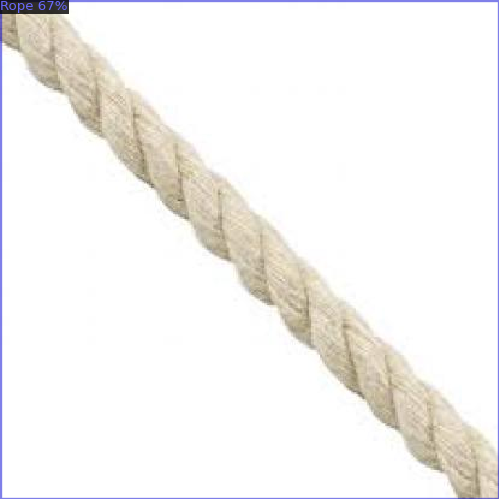

In [ ]:


from google.colab.patches import cv2_imshow

# Load the trained model weights
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.DATASETS.TEST = ("roboflow_valid",)

# Initialize the predictor
from detectron2.engine import DefaultPredictor
predictor = DefaultPredictor(cfg)

# Perform inference on a new image
import cv2
from detectron2.utils.visualizer import Visualizer

# Load an image
im = cv2.imread("/content/aiHub-1/test/000002_jpg.rf.3fe959f5175a87e988c5a5f69d779fcd.jpg")

# Make predictions
outputs = predictor(im)

# Visualize the predictions
v = Visualizer(im[:, :, ::-1], metadata=roboflow_metadata, scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Display the image in Colab
cv2_imshow(v.get_image()[:, :, ::-1])


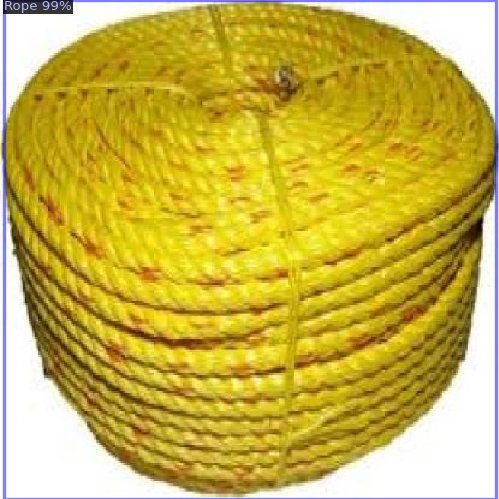

In [ ]:



# Perform inference on a new image
import cv2
from detectron2.utils.visualizer import Visualizer

# Load an image
im = cv2.imread("/content/aiHub-1/test/000047_jpg.rf.17eca05dd409201e88234dd87049ee2b.jpg")

# Make predictions
outputs = predictor(im)

# Visualize the predictions
v = Visualizer(im[:, :, ::-1], metadata=roboflow_metadata, scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Display the image in Colab
cv2_imshow(v.get_image()[:, :, ::-1])



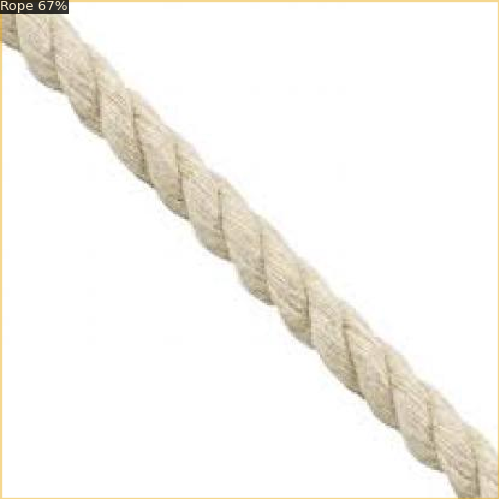

In [ ]:
from google.colab.patches import cv2_imshow

# Visualize the predictions
v = Visualizer(im[:, :, ::-1], metadata=roboflow_metadata, scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Display the image in Colab
cv2_imshow(v.get_image()[:, :, ::-1])


In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("roboflow_valid", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "roboflow_valid")
inference_on_dataset(trainer.model, val_loader, evaluator)


WARNING [09/29 22:14:02 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[09/29 22:14:02 d2.evaluation.coco_evaluation]: Trying to convert 'roboflow_valid' to COCO format ...
[09/29 22:14:02 d2.data.datasets.coco]: Converting annotations of dataset 'roboflow_valid' to COCO format ...)
Categories found in dataset: [{'id': 0, 'name': 'aiHub', 'supercategory': 'none'}, {'id': 1, 'name': 'Hammer', 'supercategory': 'aiHub'}, {'id': 2, 'name': 'Pliers', 'supercategory': 'aiHub'}, {'id': 3, 'name': 'Rope', 'supercategory': 'aiHub'}, {'id': 4, 'name': 'Screw Driver', 'supercategory': 'aiHub'}, {'id': 5, 'name': 'Tool Box', 'supercategory': 'aiHub'}, {'id': 6, 'name': 'Wrench', 'supercategory': 'aiHub'}]
[09/29 22:14:02 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[09/29 22:14:02 d2.data.datasets.coco]: Conversion finished, #images: 51, #annotations: 82
[09/29 22:14:02 d2.data.d

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.


[09/29 22:14:03 d2.evaluation.evaluator]: Inference done 11/51. Dataloading: 0.0057 s/iter. Inference: 0.0889 s/iter. Eval: 0.0018 s/iter. Total: 0.0964 s/iter. ETA=0:00:03
[09/29 22:14:08 d2.evaluation.evaluator]: Total inference time: 0:00:05.272654 (0.114623 s / iter per device, on 1 devices)
[09/29 22:14:08 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:04 (0.100978 s / iter per device, on 1 devices)
[09/29 22:14:08 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[09/29 22:14:08 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[09/29 22:14:08 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[09/29 22:14:08 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[09/29 22:14:08 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.02 seconds.
[09/29 22:14:08 d2.evaluation.

OrderedDict([('bbox',
              {'AP': 39.42582941774105,
               'AP50': 60.28913313689657,
               'AP75': 41.32961052590439,
               'APs': nan,
               'APm': 10.960533553355333,
               'APl': 41.81463308710007,
               'AP-aiHub': nan,
               'AP-Hammer': 25.411390223084606,
               'AP-Pliers': 21.346888046336392,
               'AP-Rope': 70.67120915388242,
               'AP-Screw Driver': 16.441348944255477,
               'AP-Tool Box': 62.92656765676568,
               'AP-Wrench': 39.75757248212168})])

## *YOLOV8* for second part

In [30]:
from roboflow import Roboflow

rf = Roboflow(api_key="TRvMLH0MTtAixwMfffaA")
project = rf.workspace("pxrksuhn").project("aihub-aizqc")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.0, to fix: `pip install ultralytics==8.0.196`


In [31]:
# Check the location where the dataset was downloaded
print(f"Dataset location: {dataset.location}")

Dataset location: /content/aiHub-1


In [32]:
# Path to the data.yaml file
yaml_path = "/content/aiHub-1/data.yaml"

# Modify the paths in the data.yaml file
import yaml

# Load the yaml file
with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# Update the paths
data['train'] = '/content/aiHub-1/train/images'
data['val'] = '/content/aiHub-1/valid/images'

# Save the updated yaml file
with open(yaml_path, 'w') as f:
    yaml.safe_dump(data, f)

print("Updated data.yaml with correct paths.")

Updated data.yaml with correct paths.


In [35]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model (you can choose small, medium, or large models)
model = YOLO('yolov8n.pt')

# Train the YOLOv8 model on your dataset
model.train(data=f"{dataset.location}/data.yaml", epochs=5, imgsz=640, batch=10, name='custom_yolov8_model')

Ultralytics 8.3.0 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/aiHub-1/data.yaml, epochs=5, time=None, patience=100, batch=10, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=custom_yolov8_model6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

train: Scanning /content/aiHub-1/train/labels.cache... 534 images, 0 backgrounds, 0 corrupt: 100%|██████████| 534/534 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/aiHub-1/valid/labels.cache... 51 images, 0 backgrounds, 0 corrupt: 100%|██████████| 51/51 [00:00<?, ?it/s]

Plotting labels to runs/detect/custom_yolov8_model6/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.00046875), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/custom_yolov8_model6
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.106      3.446      1.471         18        640: 100%|██████████| 54/54 [06:48<00:00,  7.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.69s/it]

                   all         51         82     0.0243      0.869      0.144     0.0921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G       1.07      3.099      1.432          7        640: 100%|██████████| 54/54 [06:41<00:00,  7.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.82s/it]

                   all         51         82      0.745     0.0641      0.174      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.117      2.784      1.441         23        640: 100%|██████████| 54/54 [06:48<00:00,  7.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.76s/it]

                   all         51         82     0.0826      0.352      0.225      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.101      2.588      1.451         31        640: 100%|██████████| 54/54 [06:47<00:00,  7.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.82s/it]

                   all         51         82      0.284      0.473      0.374      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.031      2.372      1.392         26        640: 100%|██████████| 54/54 [06:42<00:00,  7.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.65s/it]

                   all         51         82      0.343      0.418      0.415      0.242



5 epochs completed in 0.587 hours.
Optimizer stripped from runs/detect/custom_yolov8_model6/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/custom_yolov8_model6/weights/best.pt, 5.6MB

Validating runs/detect/custom_yolov8_model6/weights/best.pt...
Ultralytics 8.3.0 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 186 layers, 2,685,538 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.91s/it]


                   all         51         82      0.342      0.418      0.414      0.243
                Hammer          7         18      0.256      0.079      0.267      0.197
                Pliers          7          8      0.223       0.25      0.204      0.101
                  Rope         12         13      0.434      0.923       0.65      0.369
          Screw Driver          8         14      0.243      0.214       0.18      0.116
              Tool Box          6          7      0.587      0.857      0.876      0.486
                Wrench         12         22      0.307      0.182      0.307      0.191
Speed: 2.8ms preprocess, 265.4ms inference, 0.0ms loss, 9.6ms postprocess per image
Results saved to runs/detect/custom_yolov8_model6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x789881963d90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     


image 1/1 /content/aiHub-1/test/images/000002_jpg.rf.3fe959f5175a87e988c5a5f69d779fcd.jpg: 640x640 2 Ropes, 203.1ms
Speed: 4.8ms preprocess, 203.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Hammer', 1: 'Pliers', 2: 'Rope', 3: 'Screw Driver', 4: 'Tool Box', 5: 'Wrench'}
obb: None
orig_img: array([[[173, 194, 216],
        [172, 193, 215],
        [185, 208, 230],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[163, 184, 206],
        [163, 184, 206],
        [177, 200, 222],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[150, 171, 193],
        [152, 173, 195],
        [166, 189, 211],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
     

array([[[173, 194, 216],
        [200, 214, 226],
        [243, 243, 243],
        ...,
        [243, 243, 243],
        [243, 243, 243],
        [243, 243, 243]],

       [[190, 205, 218],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [243, 243, 243],
        [243, 243, 243],
        [243, 243, 243]],

       [[171, 186, 203],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [243, 243, 243],
        [243, 243, 243],
        [243, 243, 243]],

       ...,

       [[253, 253, 253],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [243, 243, 243],
        [243, 243, 243],
        [243, 243, 243]],

       [[253, 253, 253],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [243, 243, 243],
        [243, 243, 243],
        [243, 243, 243]],

       [[249, 249, 249],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [243, 243, 243],
        [243, 243, 243],
        [243, 243, 243]]], dtype=uint8)
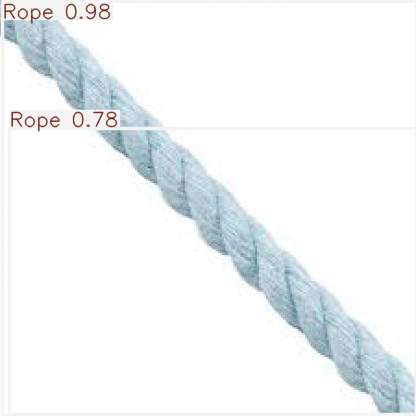

In [47]:
from ultralytics import YOLO

# Load the trained YOLOv8 model from custom_yolov8_model2
model = YOLO('/content/runs/detect/custom_yolov8_model6/weights/best.pt')

# Load an image for inference
image_path = "/content/aiHub-1/test/images/000002_jpg.rf.3fe959f5175a87e988c5a5f69d779fcd.jpg"

# Perform inference on a single image
results = model(image_path)

# Access the first result from the list
result = results[0]

print(result)

# Display the image with predictions
result.plot()

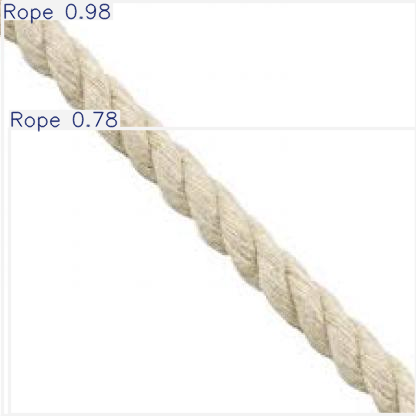

In [48]:
from google.colab.patches import cv2_imshow
import cv2

# Load and display the image with predictions
img = cv2.imread(image_path)
img = results[0].plot()
cv2_imshow(img)
